In [9]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import io
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [79]:
#####################################################################################################################
#Loading data from mat file
#####################################################################################################################
mat_data = io.loadmat('PROACT_data_updated.mat')

#Extracting relevant variables from the loaded dictionary
data=mat_data['data']
data=np.delete(data,18,axis=1)

target=mat_data['survived']
Dt=mat_data['Dt']
labels=mat_data['labels'][0]
labels=np.delete(labels,18)
pat_id=mat_data['Pat_ID']

#####################################################################################################################
## Hard coding a train/test split across patient without any randomization
# It could randomized by making a random train/test split on pat_id
# And then using the corresponding indexes to extract corresponding visit records
#####################################################################################################################
Xtrain=data[0:11326,:]
Xtest=data[11326:,:]
# Target values for each time slot of 3 months:
# 0  survived
# 1  tracheotomy/death
# -1 not known (patient dropped out of follow up)
target_train=target[0:11326,:]
target_test=target[11326:,:]

# Naive way of train/test splitting, assuming visit independence
# Xtrain, Xtest, target_train, target_test = train_test_split(data, target[:,3], test_size=0.3)

Out of bag accuracy is: 0.7521
Train accuracy is: 1.0000
Test accuracy is: 0.6928


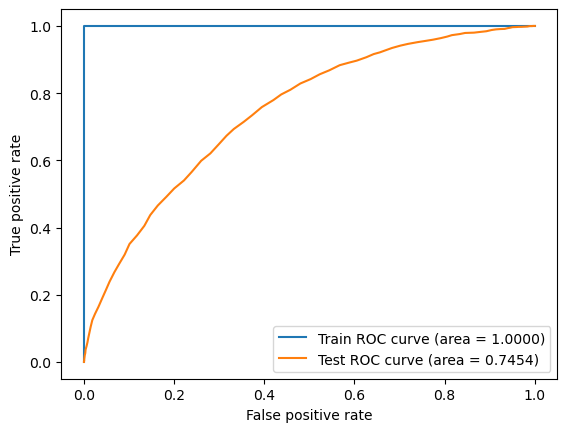

In [80]:
#####################################################################################################################
# Estimating survival in the 4th trimester
#####################################################################################################################

Ytrain=target_train[:,3]
Ytest=target_test[:,3]


RF= RandomForestClassifier(random_state=42, oob_score=True, n_estimators=100)

    
RF.fit(Xtrain[Ytrain>-1,:],Ytrain[Ytrain>-1])
Pest=RF.predict_proba(Xtrain)
pred_train=Pest[:,1]

# Predicting classification
Yest=RF.predict(Xtest)
# Predicting the probability of belonging to class 0 and class 1
Pest=RF.predict_proba(Xtest)

pred_test=Pest[:,1]
oob_accuracy= RF.oob_score_
train_accuracy=RF.score(Xtrain[Ytrain>-1,:],Ytrain[Ytrain>-1])
test_accuracy=RF.score(Xtest[Ytest>-1,:], Ytest[Ytest>-1])

print('Out of bag accuracy is: {:.4f}'.format(oob_accuracy))
print('Train accuracy is: {:.4f}'.format(train_accuracy))
print('Test accuracy is: {:.4f}'.format(test_accuracy))

fpr_t, tpr_t, th_t = metrics.roc_curve(Ytrain[Ytrain>-1], pred_train[Ytrain>-1])
train_auc = metrics.auc(fpr_t, tpr_t)

fpr, tpr, th = metrics.roc_curve(Ytest[Ytest>-1], pred_test[Ytest>-1])
test_auc = metrics.auc(fpr, tpr)

plt.plot(fpr_t,tpr_t, label='Train ROC curve (area = {:.4f})'.format(train_auc))
plt.plot(fpr,tpr, label='Test ROC curve (area = {:.4f})'.format(test_auc))

plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

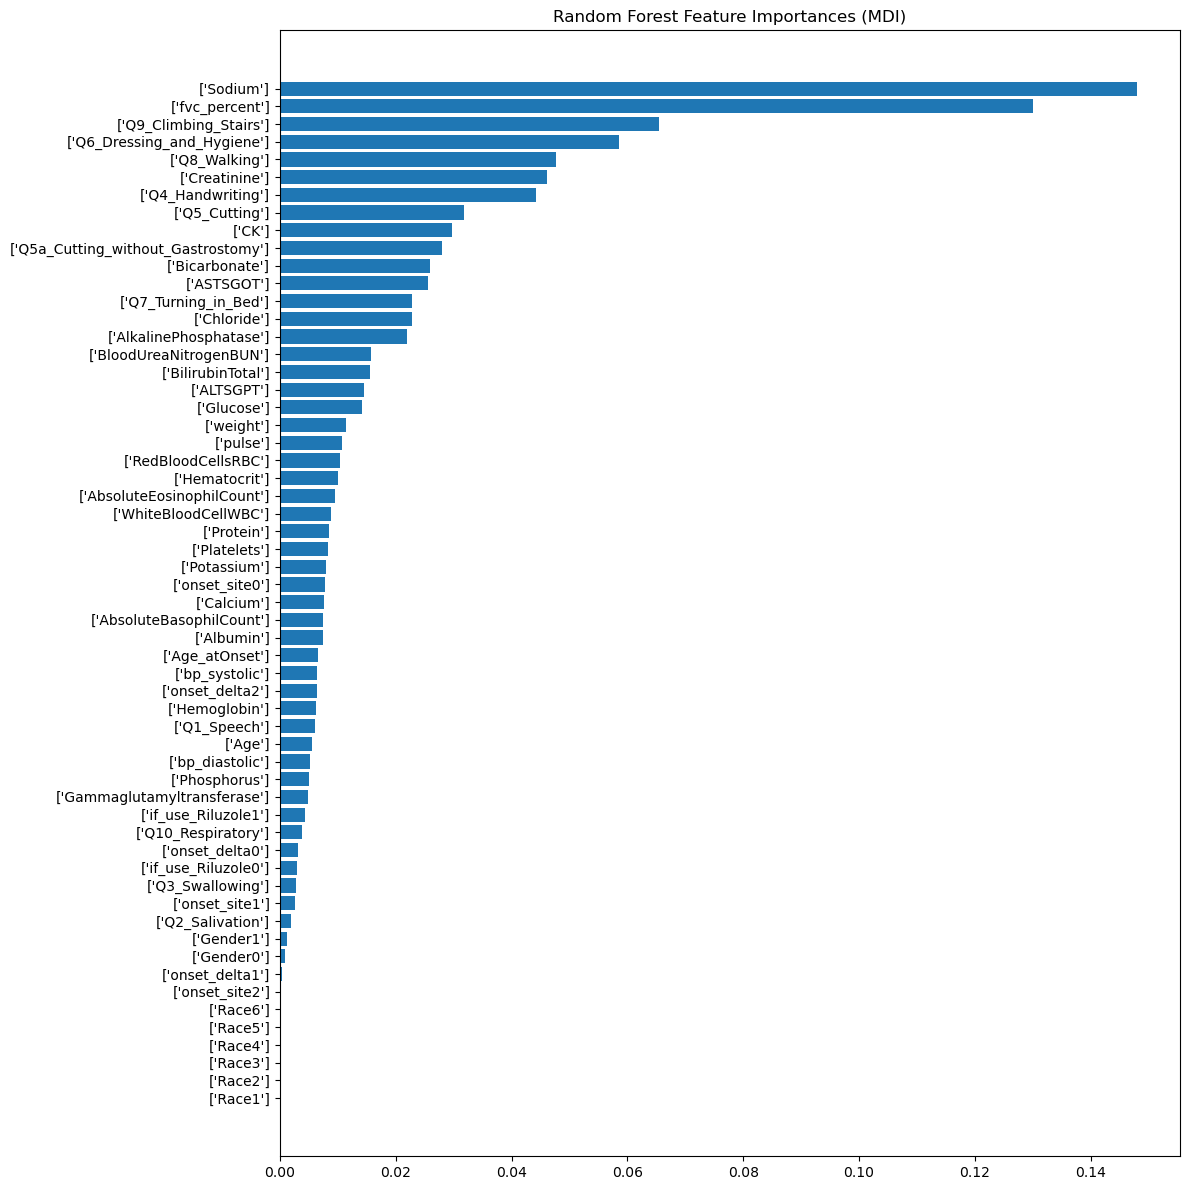

In [84]:
#####################################################################################################################
# Feature importance
#####################################################################################################################

tree_feature_importances = RF.feature_importances_
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, 58)
fig=plt.figure(figsize=(12,12))
ax = fig.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(labels[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

Out of bag accuracy is: 0.8879
Train accuracy is: 0.8879
Test accuracy is: 0.8964


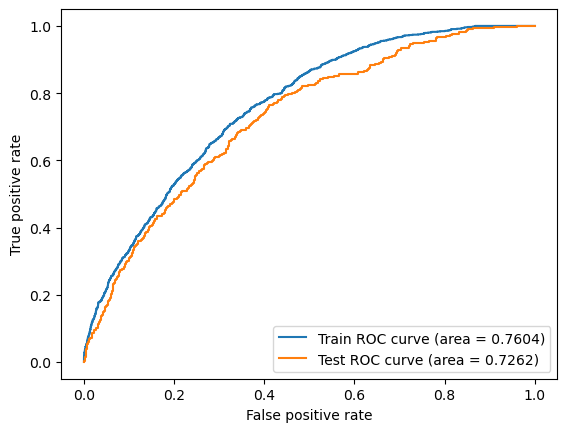

In [83]:
#####################################################################################################################
# Regularizing the decision trees
#####################################################################################################################
RF= RandomForestClassifier(random_state=42, oob_score=True, n_estimators=100,min_samples_leaf=100, max_depth=5)

    
RF.fit(Xtrain[Ytrain>-1,:],Ytrain[Ytrain>-1])
Pest=RF.predict_proba(Xtrain)
pred_train=Pest[:,1]

# Predicting classification
Yest=RF.predict(Xtest)
# Predicting the probability of belonging to class 0 and class 1
Pest=RF.predict_proba(Xtest)

pred_test=Pest[:,1]
oob_accuracy= RF.oob_score_
train_accuracy=RF.score(Xtrain[Ytrain>-1,:],Ytrain[Ytrain>-1])
test_accuracy=RF.score(Xtest[Ytest>-1,:], Ytest[Ytest>-1])

print('Out of bag accuracy is: {:.4f}'.format(oob_accuracy))
print('Train accuracy is: {:.4f}'.format(train_accuracy))
print('Test accuracy is: {:.4f}'.format(test_accuracy))

fpr_t, tpr_t, th_t = metrics.roc_curve(Ytrain[Ytrain>-1], pred_train[Ytrain>-1])
train_auc = metrics.auc(fpr_t, tpr_t)

fpr, tpr, th = metrics.roc_curve(Ytest[Ytest>-1], pred_test[Ytest>-1])
test_auc = metrics.auc(fpr, tpr)

plt.plot(fpr_t,tpr_t, label='Train ROC curve (area = {:.4f})'.format(train_auc))
plt.plot(fpr,tpr, label='Test ROC curve (area = {:.4f})'.format(test_auc))

plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

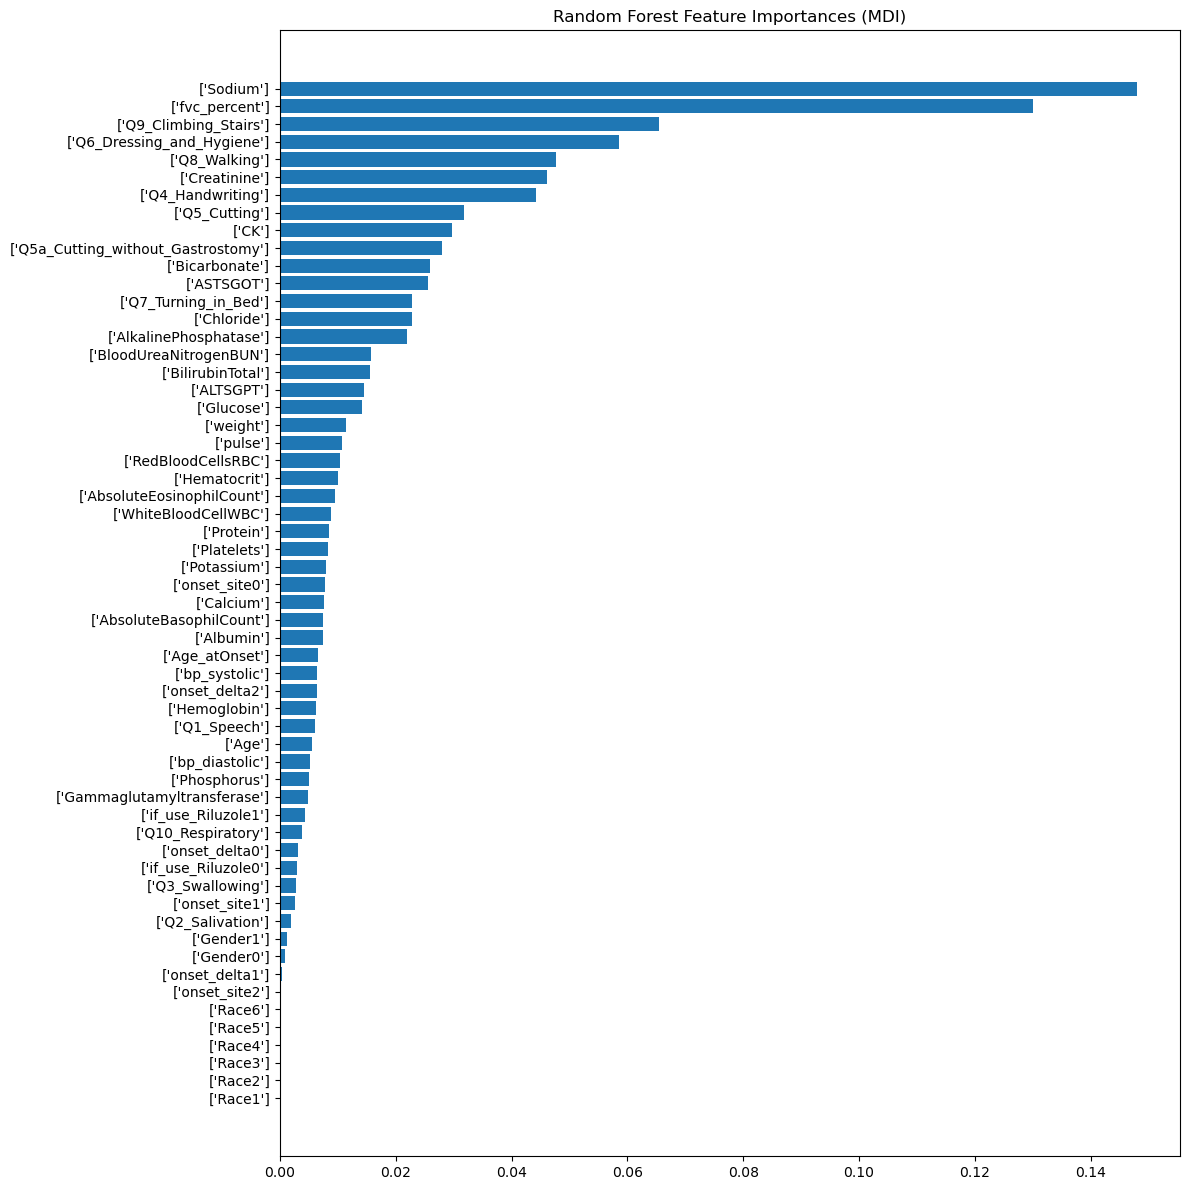

In [85]:
#####################################################################################################################
# Feature importance
#####################################################################################################################

tree_feature_importances = RF.feature_importances_
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, 58)
fig=plt.figure(figsize=(12,12))
ax = fig.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(labels[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()